In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

In [3]:
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sns.set_palette("Dark2")

In [4]:
meta = pd.read_csv("../../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')

In [5]:
drug_df = pd.read_csv("../../data/drug/drug_final_processed_eg_id.csv.gz", low_memory=False)
drug_df = drug_df[drug_df['cell_line_name'].isin(meta['Cell_line'])]

In [6]:
drug_meta_old = pd.read_csv("../../data/drug/archive/Dataset_EV2.csv",
                            low_memory=False)
drug_old_target_pathway_map = drug_meta_old.drop_duplicates(
    ['Name']).set_index('Name').to_dict()['Pathway']

In [13]:
drug_names_old = pd.read_csv("../../data/drug/archive/ic50_processed.csv", low_memory=False)['Drug name'].unique()

In [ ]:
drug_old_df['target_pathway'] = drug_old_df['Drug name'].map(drug_old_target_pathway_map)

In [ ]:
print(drug_old_df.shape)
print(drug_df.shape)

In [ ]:
(drug_df.shape[0] - drug_old_df.shape[0]) / drug_old_df.shape[0]

In [ ]:
drug_df['drug_name'].unique().size

In [ ]:
print(drug_old_names.size)

In [ ]:
set(drug_old_df['Drug name'].unique()) - set(drug_df['drug_name'].unique())

In [ ]:
drug_df['target_pathway'].unique().size

In [ ]:
drug_old_df['target_pathway'].unique().size

In [ ]:
(drug_df['drug_name'].unique().size - drug_old_df['Drug name'].unique().size
 ) / drug_old_df['Drug name'].unique().size

In [ ]:
print(drug_old_df.groupby(['Drug Id']).size().median())
print(drug_df.groupby(['drug_id']).size().median())

In [ ]:
drug_old_df.groupby(['Drug name']).size().max()

## by target pathways

In [14]:
# drug_names_old = drug_old_df['Drug name'].unique()

In [15]:
df_pathway_count = drug_df.drop_duplicates(['drug_name']).groupby(
    ['target_pathway']).size().reset_index(name='count')

In [16]:
df_old_pathway_count = drug_df[drug_df['drug_name'].isin(drug_names_old)].drop_duplicates(
    ['drug_name']).groupby(['target_pathway']).size().reset_index(name='count')

In [17]:
pathway_counts_df = pd.merge(df_pathway_count,
                             df_old_pathway_count,
                             how='outer',
                             on=['target_pathway'], suffixes=['_old','_new']).fillna(0)
pathway_counts_df['count_new_sum'] = pathway_counts_df['count_old'] + pathway_counts_df['count_new']

In [18]:
pathway_counts_df

,target_pathway,count_old,count_new,count_new_sum
0,ABL signaling,3,2.0,5.0
1,Apoptosis regulation,28,17.0,45.0
2,Cell cycle,43,21.0,64.0
3,Chromatin histone acetylation,23,17.0,40.0
4,Chromatin histone methylation,26,7.0,33.0
5,Chromatin other,16,9.0,25.0
6,Cytoskeleton,12,9.0,21.0
7,DNA replication,22,19.0,41.0
8,EGFR signaling,20,7.0,27.0
9,ERK MAPK signaling,35,18.0,53.0


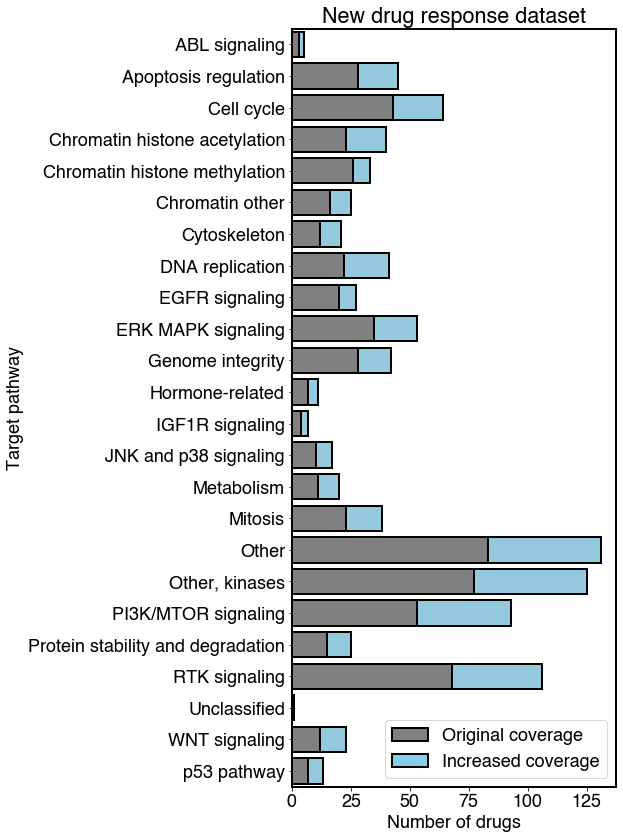

In [19]:
plt.figure(figsize=(9, 12))
sns.barplot(x='count_new_sum',
            y='target_pathway',
            data=pathway_counts_df,
            color='skyblue',
            linewidth=2,
            edgecolor='black')
sns.barplot(x='count_old',
            y='target_pathway',
            data=pathway_counts_df,
            color='grey',
            linewidth=2,
            edgecolor='black')

total_patch = mpatches.Patch(facecolor='skyblue',
                             label='Increased coverage',
                             linewidth=2,
                             edgecolor='black')
ori_patch = mpatches.Patch(facecolor='grey',
                           label='Original coverage',
                           linewidth=2,
                           edgecolor='black')

plt.legend(handles=[ori_patch, total_patch])
plt.ylabel("Target pathway")
plt.xlabel("Number of drugs")
plt.title("New drug response dataset")
plt.tight_layout()
plt.savefig("../../plots/drug/drug_coverage.pdf", dpi=500)

In [20]:
pathway_counts_df.to_csv("../../plots/plot_data/Fig1D_drug_coverage.csv",
                         index=False)